In [9]:
import numpy as np
from scipy import interpolate
import scipy.integrate as integrate
from astropy.cosmology import WMAP9 as cosmo
import matplotlib.pyplot as plt
import scipy.constants as sc
from scipy import signal
from timeit import default_timer as timer
import csv

from scipy.interpolate import RectBivariateSpline


import window_function_3D
import phase_corr_make_universe_3D as uni
import pspec_3D 


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Correlation function, $r(k)$, at each redshift 

In [81]:
r6 = open('r_CII_21cm_z6.csv')
r7 = open('r_CII_21cm_z7.csv')
r8 = open('r_CII_21cm_z8.csv')

csv6 = csv.reader(r6)
csv7 = csv.reader(r7)
csv8 = csv.reader(r8)

rows6 = []
for row in csv6:
        rows6.append(row)
        
r_6 = np.zeros((len(rows6),2))

for i in range(len(rows6)):
    for j in range(len(rows6[1])):
        r_6[i,j] = float(rows6[i][j])
        
rows7 = []
for row in csv7:
        rows7.append(row)
        
r_7 = np.zeros((len(rows7),2))

for i in range(len(rows7)):
    for j in range(len(rows7[1])):
        r_7[i,j] = float(rows7[i][j])
        
rows8 = []
for row in csv8:
        rows8.append(row)
        
r_8 = np.zeros((len(rows8),2))

for i in range(len(rows8)):
    for j in range(len(rows8[1])):
        r_8[i,j] = float(rows8[i][j])
    

/var/folders/rx/h899l7s51ds34rqj_3lmczzh0000gn/T/ipykernel_3119/1481092321.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(r_6[0:,]),r_6[0:,1],label = 'z=6')
/var/folders/rx/h899l7s51ds34rqj_3lmczzh0000gn/T/ipykernel_3119/1481092321.py:1: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(r_6[0:,]),r_6[0:,1],label = 'z=6')
/var/folders/rx/h899l7s51ds34rqj_3lmczzh0000gn/T/ipykernel_3119/1481092321.py:2: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(r_7[0:,]),r_7[0:,1], label = 'z=7')
/var/folders/rx/h899l7s51ds34rqj_3lmczzh0000gn/T/ipykernel_3119/1481092321.py:3: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(r_8[0:,]),r_8[0:,1], label = 'z=8')


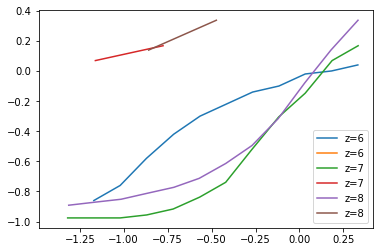

In [87]:
plt.plot(np.log10(r_6[0:,]),r_6[0:,1],label = 'z=6')
plt.plot(np.log10(r_7[0:,]),r_7[0:,1], label = 'z=7')
plt.plot(np.log10(r_8[0:,]),r_8[0:,1], label = 'z=8')
plt.legend()

# 1) Creating z chunks with HERA $\nu$ resolution

CCAT-HERA $z$ overlap: 6-9 

Corresponding HERA freqs: 202.85714285714286-0.9937018894331701 GHz

freq resolution = 97 KHz

Angualar size = 4 deg$^2$ ( $2\times2$)

# Define frequency chunks and mid freq for each coeval chunk

Here we need to define the coeval chunks along the frequency direction. The mid frequency of each chunk will define the estimated redshift of the chunk.

We're using a correlation length of z ~ 0.5

In [ ]:
freqs = np.linspace()

In [6]:
npix_row,npix_col, npix_aisle = 50,50,50

z_mid = (1420/150)-1
print(z_mid)

theta_x = np.deg2rad(2)
theta_y = np.deg2rad(2)

print(theta_x)
print(theta_y)

theta_x = Lx/(cosmo.comoving_distance(z_mid).value)
theta_y = Ly/(cosmo.comoving_distance(z_mid).value)

Lz = 325.49848672680474
nu = Lz/(((sc.c*((1+8)**2))/(cosmo.H0.value*1000*(1.24e9)*cosmo.efunc(8))))

nbins = 30

def ps(x):
    mu, sigma = 0.2,0.04
    return  2*np.exp( - (x - mu)**2 / (2 * sigma**2))

8.466666666666667
0.03490658503988659
0.03490658503988659


In [ ]:
uni_3d = uni.universe(ps,npix_row,npix_col,npix_aisle, Ly,Lx,Lz,0,1)
uni_3d.make_universe()